In [1]:
import codecs
import pandas as pd
import numpy as np
import csv
from StringIO import StringIO

In [2]:
pwd

u'C:\\Users\\Tara'

In [3]:
cd E:\MelbDatathon2018

E:\MelbDatathon2018


In [4]:
#with codecs.open('newMykifile.txt', 'r') as f:
#    data = f.read()

In [5]:
with codecs.open('QID3533466_20180713-Week26On.txt', 'r') as f:
    data = f.read()


In [6]:
#df = pd.read_csv(StringIO(data.replace('”', '"')), sep='|', encoding='utf-8', quoting=csv.QUOTE_NONNUMERIC, dtype={'Mode':'category', 'BusinessDate':'category', 'DateTime':'category', 'CardID':'int64', 'CardType':'category', 'VehicleID':'category', 'ParentRoute':'category', 'RouteID':'int64', 'StopID':'float64'})

In [7]:
#('Mode','BusinessDate','DateTime','CardID','CardType','VehicleID','ParentRoute','RouteID','StopID')

In [8]:
# Read file with null vakues in parent route 

In [6]:
df = pd.read_csv(StringIO(data.replace('”', '"')), sep='|', encoding='utf-8', quoting=csv.QUOTE_NONNUMERIC, 
                 dtype={'Mode':'category', 'BusinessDate':'category', 'DateTime':'category', 'CardID':'int64',
                        'CardType':'category', 'VehicleID':'category', 'ParentRoute':'category','RouteID':'int64', 'StopID':'int64'})

In [7]:
col_Names = ["Mode","BusinessDate","DateTime","CardID","CardType","VehicleID","ParentRoute","RouteID","StopID"]    


In [8]:
df.columns=col_Names

In [9]:
df.head()

Mode BusinessDate             DateTime      CardID  CardType  VehicleID  \
0   2.0   2018-06-24  2018-06-24 15:59:32  13771650.0       1.0        0.0   
1   2.0   2018-06-27  2018-06-27 08:19:01  24113950.0       1.0        0.0   
2   2.0   2018-06-29  2018-06-29 17:38:39  24378490.0       1.0        0.0   
3   2.0   2018-06-26  2018-06-26 19:23:17  13999820.0       1.0        0.0   
4   2.0   2018-06-29  2018-06-29 18:27:17  19686950.0       1.0        0.0   

  ParentRoute  RouteID   StopID  
0         NaN     14.0  19881.0  
1         NaN     14.0  19959.0  
2         NaN     14.0  19959.0  
3         NaN     14.0  19959.0  
4         NaN     14.0  19959.0

In [10]:
df.dtypes

Mode            float64
BusinessDate     object
DateTime         object
CardID          float64
CardType        float64
VehicleID       float64
ParentRoute      object
RouteID         float64
StopID          float64
dtype: object

In [11]:
print df.shape

(681059, 9)


In [12]:
for col in df.columns:
    if (df[col].dtype.name == 'object'):
        print df[col].value_counts(), '\n'

2018-06-28    120734
2018-06-29    118526
2018-06-27    116340
2018-06-26    116191
2018-06-25    111822
2018-06-30     53858
2018-06-24     43588
Name: BusinessDate, dtype: int64 

2018-06-28 17:22:19    15
2018-06-26 08:16:39    15
2018-06-28 08:12:43    15
2018-06-25 08:03:35    14
2018-06-26 07:52:55    14
2018-06-29 07:55:06    14
2018-06-25 07:54:13    14
2018-06-27 08:00:40    14
2018-06-27 07:52:07    14
2018-06-26 08:21:06    14
2018-06-28 08:17:21    14
2018-06-26 17:54:58    14
2018-06-28 08:16:25    14
2018-06-29 07:57:57    14
2018-06-26 08:09:09    14
2018-06-28 08:12:27    14
2018-06-25 17:08:57    14
2018-06-28 08:07:06    13
2018-06-26 08:12:53    13
2018-06-26 07:52:36    13
2018-06-28 17:26:19    13
2018-06-25 17:38:15    13
2018-06-25 08:05:49    13
2018-06-27 17:16:20    13
2018-06-26 08:11:50    13
2018-06-27 17:10:37    13
2018-06-28 07:42:01    13
2018-06-25 17:44:43    13
2018-06-25 17:08:43    13
2018-06-25 08:16:01    13
                       ..
2018-06-30 1

In [13]:
for col in df.columns:
    if (df[col].dtype.name == 'category'):
        print df[col].value_counts(), '\n'

In [14]:
for col in df.columns:
    if (df[col].dtype.name in ['category', 'str', 'object']):
        # 4. Check for extra whitespaces and remove them
        df[col] = df[col].str.strip()
        # 5. Cast text to lower-case
        df[col] = df[col].str.lower()

In [15]:
df.describe()

Mode        CardID       CardType      VehicleID  \
count  681059.000000  6.810590e+05  681059.000000  681059.000000   
mean        1.986477  1.945629e+07       5.773106     697.860055   
std         0.647837  4.197735e+06      14.314991    1023.863517   
min         1.000000  1.970000e+04       0.000000       0.000000   
25%         2.000000  1.650173e+07       1.000000       0.000000   
50%         2.000000  2.055806e+07       1.000000       0.000000   
75%         2.000000  2.308089e+07       4.000000    1241.000000   
max         3.000000  2.445187e+07      71.000000    3410.000000   

             RouteID         StopID  
count  681059.000000  681059.000000  
mean     8270.317895   29990.191409  
std     12422.862900   20082.389351  
min         1.000000       4.000000  
25%         2.000000   19738.000000  
50%        16.000000   19984.000000  
75%     17277.000000   46468.000000  
max     35572.000000   64408.000000

In [16]:
#For this instance:
# from df.describe we have minimun for (Mode:RouteID:1, CadrdID:19700, CardType:VehicleID:0, StopID:4)
#Maximum values  (Mode:3, CadrdID:2.4451870, CardType:71, VehicleID:3410, RouteID:35572, StopID:64408)

In [17]:
df.isnull().sum()

Mode                 0
BusinessDate         0
DateTime             0
CardID               0
CardType             0
VehicleID            0
ParentRoute     394590
RouteID              0
StopID               0
dtype: int64

In [18]:
df[df.ParentRoute.isnull()]

Mode BusinessDate             DateTime      CardID  CardType  \
0        2.0   2018-06-24  2018-06-24 15:59:32  13771650.0       1.0   
1        2.0   2018-06-27  2018-06-27 08:19:01  24113950.0       1.0   
2        2.0   2018-06-29  2018-06-29 17:38:39  24378490.0       1.0   
3        2.0   2018-06-26  2018-06-26 19:23:17  13999820.0       1.0   
4        2.0   2018-06-29  2018-06-29 18:27:17  19686950.0       1.0   
5        2.0   2018-06-25  2018-06-25 17:41:34  24151630.0       1.0   
6        2.0   2018-06-28  2018-06-28 17:49:07  20746610.0       1.0   
7        2.0   2018-06-25  2018-06-25 16:29:25  21884960.0       1.0   
8        2.0   2018-06-28  2018-06-28 08:51:36  16487200.0       1.0   
19       2.0   2018-06-30  2018-06-30 18:50:59  24063830.0       1.0   
20       2.0   2018-06-29  2018-06-29 14:53:08  16576630.0       1.0   
21       2.0   2018-06-30  2018-06-30 17:38:35  20844110.0       1.0   
22       2.0   2018-06-25  2018-06-25 10:28:07  21172070.0       1.0   
23       2.0   2018-06-30  2018-06-30 19:34:11  20216990.0       1.0   
24       2.0   2018-06-26  2018-06-26 07:50:03  23528940.0       7.0   
25       2.0   2018-06-28  2018-06-28 15:52:14  24405550.0       0.0   
26       2.0   2018-06-25  2018-06-25 10:09:23  20392730.0       2.0   
27       2.0   2018-06-29  2018-06-29 19:08:24  19462450.0       2.0   
28       2.0   2018-06-29  2018-06-29 17:39:17  17720130.0      61.0   
29       2.0   2018-06-30  2018-06-30 10:57:11  11260110.0       9.0   
30       2.0   2018-06-28  2018-06-28 10:59:41  23118510.0       9.0   
31       2.0   2018-06-29  2018-06-29 19:09:09  10819590.0       4.0   
32       2.0   2018-06-29  2018-06-29 15:31:02  16880510.0       4.0   
33       2.0   2018-06-30  2018-06-30 10:43:50  21008030.0       4.0   
34       2.0   2018-06-28  2018-06-28 08:38:41  21866020.0       1.0   
35       2.0   2018-06-29  2018-06-29 06:43:38  15393740.0       1.0   
36       2.0   2018-06-24  2018-06-24 07:48:19  20296450.0       1.0   
37       2.0   2018-06-27  2018-06-27 08:22:15  16735820.0       1.0   
38       2.0   2018-06-28  2018-06-28 07:43:03  20061830.0       1.0   
39       2.0   2018-06-27  2018-06-27 08:50:53  21191580.0       1.0   
...      ...          ...                  ...         ...       ...   
681019   2.0   2018-06-28  2018-06-28 08:33:15  19649080.0       1.0   
681020   2.0   2018-06-26  2018-06-26 20:19:18  20923450.0       1.0   
681021   2.0   2018-06-30  2018-06-30 22:00:28  13651740.0       1.0   
681022   2.0   2018-06-29  2018-06-29 20:55:04  16783970.0       1.0   
681023   2.0   2018-06-29  2018-06-29 15:13:32  21611500.0       1.0   
681024   2.0   2018-06-28  2018-06-28 06:26:13  11006130.0       1.0   
681025   2.0   2018-06-27  2018-06-27 07:16:38  18668260.0       1.0   
681026   2.0   2018-06-28  2018-06-28 08:32:31  20075070.0       1.0   
681027   2.0   2018-06-25  2018-06-25 12:13:47  22241610.0       1.0   
681028   2.0   2018-06-25  2018-06-25 11:04:57  16497240.0       1.0   
681029   2.0   2018-06-25  2018-06-25 17:08:00  16305950.0       1.0   
681030   2.0   2018-06-27  2018-06-27 07:03:11  16305950.0       1.0   
681031   2.0   2018-06-24  2018-06-24 09:18:49  22619350.0       1.0   
681041   2.0   2018-06-25  2018-06-25 13:59:57  21576550.0       1.0   
681042   2.0   2018-06-29  2018-06-29 17:48:30  19847140.0       1.0   
681043   2.0   2018-06-27  2018-06-27 16:09:44  16919540.0       1.0   
681044   2.0   2018-06-27  2018-06-27 18:20:56  17477040.0       1.0   
681045   2.0   2018-06-26  2018-06-26 15:52:34  22929150.0       1.0   
681046   2.0   2018-06-28  2018-06-28 17:41:55  12351580.0       1.0   
681047   2.0   2018-06-28  2018-06-28 17:59:48  12712110.0       1.0   
681048   2.0   2018-06-28  2018-06-28 18:40:49  21773200.0       1.0   
681049   2.0   2018-06-28  2018-06-28 17:27:05  19868300.0       1.0   
681050   2.0   2018-06-25  2018-06-25 16:23:52  13475220.0       1.0   
681051   2.0   2018-06-29  2018-06-29 19:39:37  

In [19]:
# ?????df.dropna(axis=0, how='any', inplace=True)

In [20]:
#we replace ParentRout Null values with 0

In [21]:
df['ParentRoute'].fillna(0, inplace=True)

In [22]:
df.isnull().sum()

Mode            0
BusinessDate    0
DateTime        0
CardID          0
CardType        0
VehicleID       0
ParentRoute     0
RouteID         0
StopID          0
dtype: int64

In [85]:
##Exploratory Data Analysis

In [86]:
#Visualization for 9 columns

In [23]:
import matplotlib.pyplot as plt

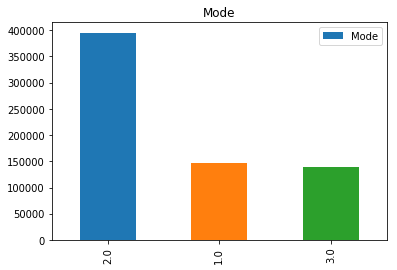

In [33]:
df['Mode'].value_counts().plot(kind='bar', title='Mode', legend=True)
plt.show()

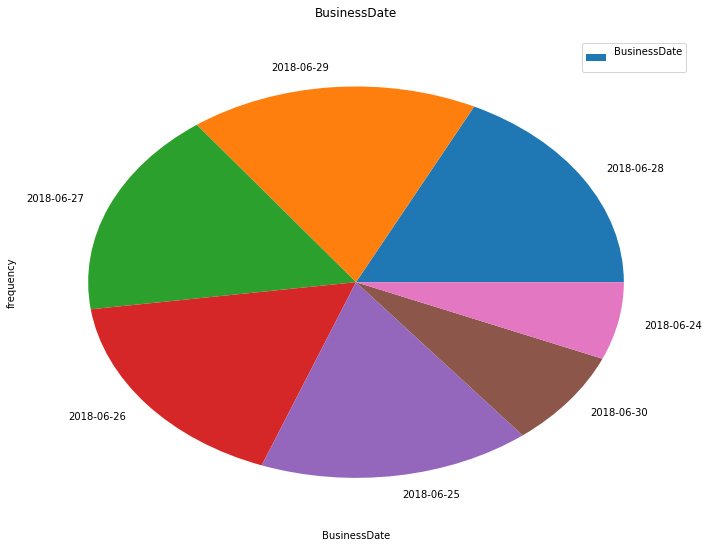

In [34]:
plt.figure(figsize=(12,9))
df['BusinessDate'].value_counts().plot(kind='pie')
plt.title('BusinessDate\n')
plt.xlabel('BusinessDate')
plt.ylabel('frequency')
plt.legend(['BusinessDate\n'])
#fig_size[0] = 12
#fig_size[1] = 9
#plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [20]:
# DateTime is the same as Date 
#df['DateTime'].value_counts().plot(kind='bar', title='Mode', legend=True)
#plt.show()


In [ ]:
#df['CardID'].value_counts().plot(kind='pie')
#plt.title('GPS Latitude of Stop Locations\n')
#plt.xlabel('CardarID')
#plt.ylabel('Values')
#plt.legend(['Card ID'])
#plt.show()

In [ ]:
df['CardID'].value_counts().plot(kind='pie', title='Mode', legend=True)
plt.show()

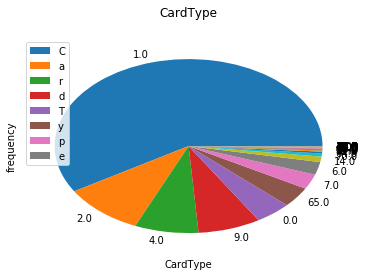

In [15]:
df['CardType'].value_counts().plot(kind='pie')
plt.title('CardType\n')
plt.xlabel('CardType')
plt.ylabel('frequency')
plt.legend('CardType')
plt.show()

In [ ]:
#df['VehicleID'].value_counts().plot(kind='pie')
#plt.title('Vehicle IDs\n')
#plt.xlabel('Range of VehicleID')
#plt.ylabel('Values')
#plt.legend('Vehicle ID')
#plt.show()

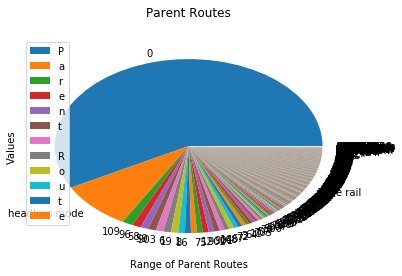

In [26]:
df['ParentRoute'].value_counts().plot(kind='pie')
plt.title('Parent Routes\n')
plt.xlabel('Range of Parent Routes')
plt.ylabel('Values')
plt.legend('Parent Route')
plt.show()

In [ ]:
# Most of the parent routs are zero or unknown(Had null values)

In [ ]:
# Route ID=1 has a quarter share of the whole

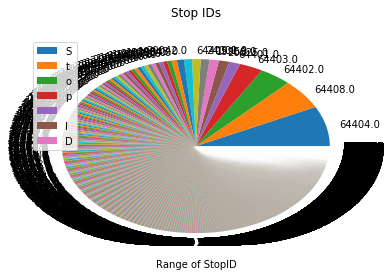

In [28]:
df['StopID'].value_counts().plot(kind='pie')
plt.title('Stop IDs\n')
plt.xlabel('Range of StopID')
plt.ylabel('Values')
plt.legend('Stop ID')
plt.show()

In [ ]:
#most of the passengers touch on in stop 64404 

In [ ]:
# Exploring the relationship between columns

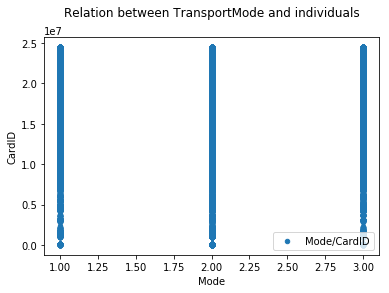

In [30]:
df.plot(kind='scatter', x='Mode', y='CardID')
plt.title('Relation between TransportMode and individuals\n')
plt.xlabel('Mode')
plt.ylabel('CardID')
plt.legend(['Mode/CardID'])
plt.show()

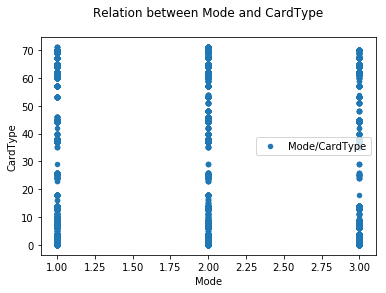

In [31]:
df.plot(kind='scatter', x='Mode', y='CardType')
plt.title('Relation between Mode and CardType\n')
plt.xlabel('Mode')
plt.ylabel('CardType')
plt.legend(['Mode/CardType'])
plt.show()

In [32]:
df.plot(kind='scatter', x='Mode', y='RouteID')
plt.title('Relation between Mode and RouteID\n')
plt.xlabel('Mode')
plt.ylabel('RouteID')
plt.legend(['Mode/RouteID'])
plt.show()

In [33]:
df.plot(kind='scatter', x='Mode', y='StopID')
plt.title('Relation between Mode and StopID\n')
plt.xlabel('Mode')
plt.ylabel('StopID')
plt.legend(['Mode/StopID'])
plt.show()

In [34]:
df.plot(kind='scatter', x='CardType', y='VehicleID')
plt.title('Relation between CardType and VehicleID\n')
plt.xlabel('CardType')
plt.ylabel('VehicleID')
plt.legend(['CardType/VehicleID'])
plt.show()

In [35]:
df.plot(kind='scatter', x='CardType', y='StopID')
plt.title('Relation between CardType and StopID\n')
plt.xlabel('CardType')
plt.ylabel('StopID')
plt.legend(['CardType/StopID'])
plt.show()

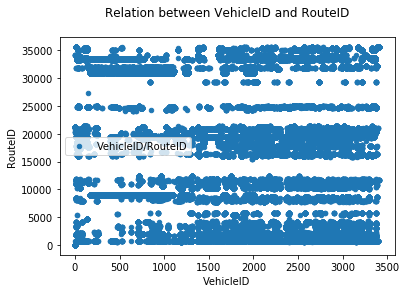

In [36]:
df.plot(kind='scatter', x='VehicleID', y='RouteID')
plt.title('Relation between VehicleID and RouteID\n')
plt.xlabel('VehicleID')
plt.ylabel('RouteID')
plt.legend(['VehicleID/RouteID'])
plt.show()

In [37]:
df.plot(kind='scatter', x='VehicleID', y='StopID')
plt.title('Relation between VehicleID and StopID\n')
plt.xlabel('VehicleID')
plt.ylabel('StopID')
plt.legend(['VehicleID/StopID'])
plt.show()

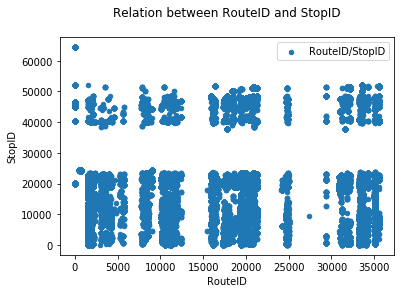

In [38]:
df.plot(kind='scatter', x='RouteID', y='StopID')
plt.title('Relation between RouteID and StopID\n')
plt.xlabel('RouteID')
plt.ylabel('StopID')
plt.legend(['RouteID/StopID'])
plt.show()

In [ ]:
#Scatter Matrix of all Numeric Columns

In [39]:
from pandas.plotting import scatter_matrix

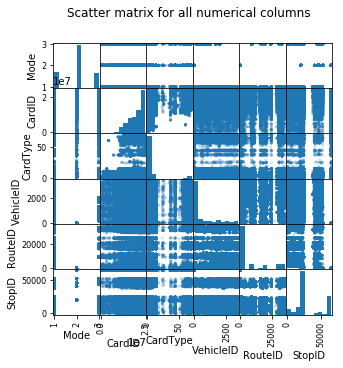

In [40]:
scatter_matrix(df,alpha=0.2,figsize=(5,5),diagonal='hist')
plt.suptitle('Scatter matrix for all numerical columns')
plt.show()

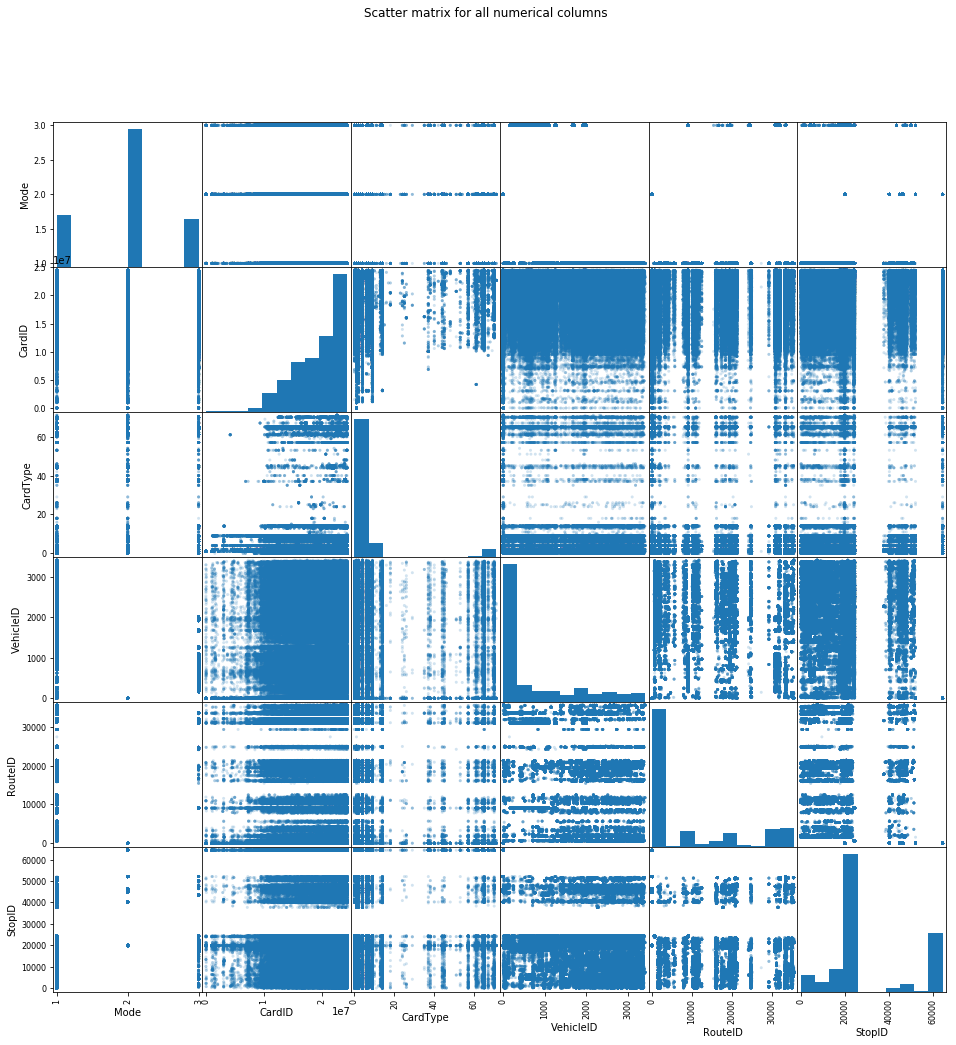

In [41]:
scatter_matrix(df,alpha=0.2,figsize=(16,16),diagonal='hist')
plt.suptitle('Scatter matrix for all numerical columns')
plt.show()

In [42]:
#df.to_csv('FinalMykiToModel.csv')
df.to_csv('FinalMykiToModel.csv', encoding='utf-8')

In [ ]:
##End of Part 1(Data retrieving and Exploration and Preparation)

In [ ]:
# Part 2